In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import copy

In [26]:
working_dir = os.getcwd()

In [27]:
solution = pd.read_csv(f"{working_dir}/../data/Solution.csv", parse_dates=['TIMESTAMP'], index_col=0)
solution = solution.filter(['POWER'], axis=1)

train_data = pd.read_csv(f"{working_dir}/../data/TrainData.csv", parse_dates=['TIMESTAMP'], index_col=0)
traindata = train_data.filter(['POWER'], axis=1)

In [28]:
traindata = pd.read_csv(f"{working_dir}/../data/TrainData.csv", parse_dates=['TIMESTAMP'], index_col=0)
traindata = traindata.filter(['POWER'], axis=1)

to_solution = traindata.tail(6)
testdata = to_solution.append(solution)

C:\Users\marti\AppData\Local\Temp\ipykernel_35548\2748263905.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testdata = to_solution.append(solution)


In [29]:
def format_time_series_data(data, window_length):
    data_copy = copy.deepcopy(data)
    
    x_data = data_copy[:-1]
    y_data = np.roll(data_copy, -window_length)[:-window_length]
    
    x_data = np.reshape(x_data, (-1, 1))
    temp_data = np.roll(x_data, -1)
    
    for _ in range(1, window_length):
        x_data = np.concatenate((x_data[:-1], temp_data[:-1]), axis=1)
        temp_data = np.roll(temp_data, -1)[:-1]
    
    return x_data, y_data.flatten()

x, y = format_time_series_data(traindata.values, 6)
x_test, y_test = format_time_series_data(testdata.values, 6)

In [30]:
# Run Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

y_pred_lr = lin_reg.predict(x_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

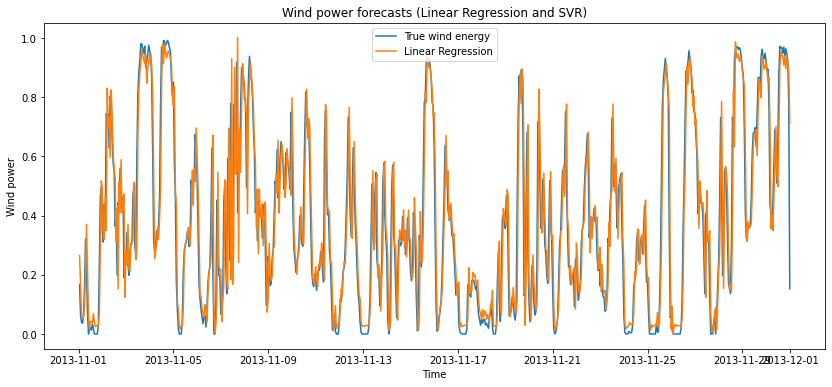

In [31]:
# Plot the time-series figure for Linear Regression and SVR
plt.figure(figsize=(14, 6))
plt.plot(solution.index, solution['POWER'].values, label="True wind energy")
plt.plot(solution.index, y_pred_lr, label="Linear Regression")
plt.xlabel("Time")
plt.ylabel("Wind power")
plt.title("Wind power forecasts (Linear Regression and SVR)")
plt.legend()
plt.show()